<a href="https://colab.research.google.com/github/dan-manolescu/data-structures-fun/blob/main/C4_Binary_Search_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Search Trees

In [1]:
class TreeNode:
    def __init__(self, value, left=None, right=None, parent=None):
        self.value = value
        self.left = left
        self.right = right
        self.parent = parent

**Iterative and recursive searches**

In [2]:
from typing import Any

def FindValue(current: TreeNode, target: Any) -> TreeNode:
    if current == None:
        return None
    if current.value == target:
        return current
    if target < current.value and current.left != None:
        return FindValue(current.left, target)
    if target > current.value and current.right != None:
        return FindValue(current.right, target)
    return None

def FindValueItr(root: TreeNode, target: Any) -> TreeNode:
    current = root
    while current != None and current.value != target:
        if target < current.value:
            current = current.left
        else:
            current = current.right

    return current

def InsertNode(current: TreeNode, new_value: Any) -> None:
    if new_value == current.value:
        # nothing to do, value already in the tree
        return
    if new_value < current.value:
        if current.left != None:
            InsertNode(current.left, new_value)
        else:
            current.left = TreeNode(new_value)
            current.left.parent = current
    else:
        if current.right != None:
            InsertNode(current.right, new_value)
        else:
            current.right = TreeNode(new_value)
            current.right.parent = current

**Binary Search Tree implementation**

In [6]:
class BinarySearchTree:
    def __init__(self, root: TreeNode):
        self.root = root

    def FindTreeNode(self, target: Any) -> TreeNode:
        if self.root == None:
            return None
        return FindValue(self.root, target)

    def InsertTreeNode(self, new_value: Any) -> None:
        if self.root == None:
            self.root = TreeNode(new_value)
        else:
            InsertNode(self.root, new_value)

    def RemoveTreeNode(self, node: TreeNode) -> None:
        if self.root == None or node == None:
            return

        # Case A: Deleting a leaf node.
        if node.left == None and node.right == None:
            if node.parent == None:
                self.root = None
            elif node.parent.left == node:
                node.parent.left = None
            else:
                node.parent.right = None
            return

        # Case B: Deleting a node with one child.
        if node.left == None or node.right == None:
            child = node.left if node.left != None else node.right

            child.parent = node.parent
            if node.parent == None:
                self.root = child
            elif node.parent.left == node:
                node.parent.left = child
            else:
                node.parent.right = child
            return

        # Case C: Deleting a node with two children.
        # Find the successor and splice it out of the tree.
        successor = node.right
        while successor.left != None:
            successor = successor.left
        self.RemoveTreeNode(successor)

        # Insert the successor in the deleted node's place
        if node.parent == None:
            self.root = successor
        elif node.parent.left == node:
            node.parent.left = successor
        else:
            node.parent.right = successor
        successor.parent = node.parent

        # Now setting the links for the left and right childrens of the successor
        successor.left = node.left
        node.left.parent = successor

        successor.right = node.right
        if node.right != None:
            node.right.parent = successor

In [7]:
from typing import List
from collections import deque

def build_subtree(A: list, left: int, right: int) -> TreeNode:
    if left == right:
        return TreeNode(A[left])
    elif left > right:
        return None

    mid = (left + right) // 2
    node = TreeNode(A[mid])
    node.left = build_subtree(A, left, mid - 1)
    if node.left != None:
        node.left.parent = node
    node.right = build_subtree(A, mid + 1, right)
    if node.right != None:
        node.right.parent = node
    return node


def build_binary_search_tree(A: List) -> BinarySearchTree:
    if len(A) == 0:
        return BinarySearchTree(None)
    A.sort()
    left = 0
    right = len(A) - 1
    mid = (left + right) // 2
    root = TreeNode(A[mid])
    root.left = build_subtree(A, left, mid - 1)
    if root.left != None:
        root.left.parent = root
    root.right = build_subtree(A, mid + 1, right)
    if root.right != None:
        root.right.parent = root
    return BinarySearchTree(root)

def print_bfs(node: TreeNode) -> None:
    if node == None:
        return
    q = deque([node])
    while q:
        row = []
        for i in range(len(q)):
            node = q.popleft()
            row.append(str(node.value))
            if node.left != None:
                q.append(node.left)
            if node.right != None:
                q.append(node.right)
        print(' '.join(row))


In [5]:
A = [1,2,3,4,5,6,7,8,9,10,11,12]
tree = build_binary_search_tree(A)
print_bfs(tree.root)

6
3 9
1 4 7 11
2 5 8 10 12


**Visualize a tree**

In [30]:
import graphviz

def visualize_binary_tree(tree: BinarySearchTree) -> graphviz.Digraph:
    dot = graphviz.Digraph()
    dot.node(str(tree.root.value))

    def add_nodes_edges(node: TreeNode) -> None:
        if node.left:
            dot.node(str(node.left.value))
            dot.edge(str(node.value), str(node.left.value))
            add_nodes_edges(node.left)
        if node.right:
            dot.node(str(node.right.value))
            dot.edge(str(node.value), str(node.right.value))
            add_nodes_edges(node.right)

    add_nodes_edges(tree.root)
    return dot

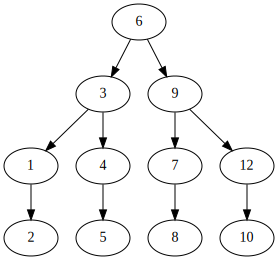

In [31]:
visualize_binary_tree(tree)

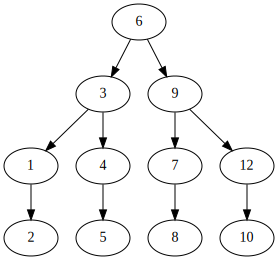

In [32]:
# removing node 11, should find successor 12 and use it as replacement
tree.RemoveTreeNode(tree.FindTreeNode(11))
visualize_binary_tree(tree)